In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
import sys
from pathlib import Path

project_root = Path.cwd().parent    
sys.path.append(str(project_root.resolve()))   # now Python can find modules there

import data_preparation   # regular import works

## Import data and transform

In [38]:
df_raw = pd.read_csv("../../Data/Refined/9019/asthma_prevalence_rate.csv")
df_raw

,Measure,Country Name,Disease,Metric,Year,Value,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),...,Oil consumption,u10,v10,d2m,t2m,sst,sp,skt,blh,PM2.5 pollution
0,Prevalence,Japan,Asthma,Rate,1990,5082.997034,JPN,..,100,9.4496485203842,...,1.97956,1.741828,1.021044,288.076401,292.252000,293.810320,102094.635435,293.628495,885.064589,13.37278
1,Prevalence,Japan,Asthma,Rate,1991,5092.603580,JPN,..,100,9.49356587396341,...,2.00120,2.286313,1.311337,288.337128,292.431930,293.870958,101983.583177,293.695755,892.493795,13.29348
2,Prevalence,Japan,Asthma,Rate,1992,5091.760356,JPN,..,100,9.49874382157927,...,2.04296,2.025161,1.717294,288.129279,292.314792,293.702229,102020.582682,293.530340,909.754829,13.22620
3,Prevalence,Japan,Asthma,Rate,1993,5081.664145,JPN,..,100,9.41083802642014,...,1.99111,1.625297,1.286398,287.874186,292.176917,293.652769,102097.751613,293.474290,902.488291,13.17147
4,Prevalence,Japan,Asthma,Rate,1994,5064.407124,JPN,..,100,9.80971896020067,...,2.10148,2.570448,1.109048,288.097394,292.441165,293.978702,102064.984418,293.796735,911.037764,13.12983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Prevalence,Sudan,Asthma,Rate,2017,4825.147679,SDN,54.1,53,0.554132847201123,...,NaN,-6.390120,-2.174717,294.064998,298.129478,298.260798,101349.605304,299.081299,828.716632,59.81684
4946,Prevalence,Sudan,Asthma,Rate,2018,4814.203984,SDN,56.25,55.3,0.539979158318373,...,NaN,-6.720369,-1.962978,294.571177,298.391357,298.527902,101285.615172,299.362520,809.267977,58.69366
4947,Prevalence,Sudan,Asthma,Rate,2019,4803.510151,SDN,58.9,57.6,0.515394963684055,...,NaN,-6.393558,-1.910857,294.429075,298.369937,298.543588,101300.024220,299.369651,819.350147,51.93562
4948,Prevalence,Sudan,Asthma,Rate,2020,4800.033188,SDN,61,59.7,0.456248148211711,...,NaN,-7.191453,-2.245633,293.988485,297.929028,298.007299,101402.090968,298.836881,847.942231,45.83490


In [39]:
df_raw.columns

Index(['Measure', 'Country Name', 'Disease', 'Metric', 'Year', 'Value',
       'Country Code',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
       'Compulsory education, duration (years)', 'GDP (current US$)',
       'GDP per capita (constant 2015 US$)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'People using at least basic sanitation services (% of population)',
       'Population, total',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Renewable electricity output (% of total electricity output)',
       'Surface area (sq. km)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'CO2 emissions', 'Coal consumption', 'Energy use', 'Electricity use',
       'Raw materi

In [40]:
columns_to_keep = [col for col in df_raw.columns if col not in ['Country Name', 'Measure', 'Metric', 'Disease']]
df_excluded = df_raw[columns_to_keep]

In [41]:
df_prepared = data_preparation.preprocessing(df_excluded)

In [42]:
# Multiple columns with apply
numeric_cols = ['Access to clean fuels and technologies for cooking (% of population)',\
                'Access to electricity (% of population)', 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',\
                'Compulsory education, duration (years)', 'GDP (current US$)','GDP per capita (constant 2015 US$)', 'Gini index',\
                'Life expectancy at birth, total (years)','Mortality rate, infant (per 1,000 live births)',\
                'People using at least basic sanitation services (% of population)',\
                'Population, total','Poverty headcount ratio at national poverty lines (% of population)',\
                'Renewable electricity output (% of total electricity output)','Surface area (sq. km)',\
                'Unemployment, total (% of total labor force) (national estimate)','CO2 emissions', 'Coal consumption',\
                'Energy use', 'Electricity use','Raw materials extracted', 'Oil consumption', 'u10', 'v10', 'd2m',\
                't2m', 'sst', 'sp', 'skt', 'blh', 'PM2.5 pollution']

df_prepared[numeric_cols] = df_prepared[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [108]:
df_imputed = data_preparation.impute_nans_no_encoding(df_prepared)
df_imputed

C:\Users\rapso\miniconda3\envs\cours-apv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Year,Value,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"Compulsory education, duration (years)",GDP (current US$),GDP per capita (constant 2015 US$),Gini index,...,Oil consumption,u10,v10,d2m,t2m,sst,sp,skt,blh,PM2.5 pollution
3192,1990,5036.145645,AFG,5.5,4.4,0.242594,6.0,3.521418e+09,308.318270,35.468205,...,0.363482,1.104314,-0.088217,276.621307,289.848591,58.150284,92054.426375,291.201735,654.260246,64.17410
3193,1991,5039.093665,AFG,5.5,4.4,0.232619,6.0,3.521418e+09,308.318270,35.603058,...,0.335764,1.089412,-0.166440,276.714434,289.569879,57.947076,92048.016117,290.929247,648.752654,64.18815
3194,1992,5039.644898,AFG,5.5,4.4,0.137051,6.0,3.521418e+09,308.318270,34.828000,...,0.280336,0.854820,-0.127481,278.314554,290.162019,58.259876,92013.210162,291.282056,616.513723,64.21053
3195,1993,4930.052845,AFG,5.5,4.4,0.119439,6.0,3.521418e+09,308.318270,33.396083,...,0.244022,1.096959,-0.054136,277.578857,290.150848,58.170655,92020.645875,291.251716,632.031749,64.24414
3196,1994,4797.861343,AFG,5.5,4.4,0.103700,6.0,3.521418e+09,308.318270,34.720037,...,0.210862,1.110697,-0.046804,276.891953,290.330769,58.064800,92055.177142,291.695890,660.147580,64.29192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,2017,2711.324736,ZWE,30.1,44.0,0.714627,7.0,5.107473e+10,1422.193460,44.300000,...,0.276841,-4.076857,0.314313,294.910941,298.817708,300.530401,101367.095519,300.315422,714.085136,17.99775
4436,2018,2717.755086,ZWE,30.3,45.4,0.816126,7.0,3.415606e+10,1471.394890,44.300000,...,0.312491,-3.782889,0.081234,294.823043,298.628095,300.351173,101341.051540,300.140890,677.411190,19.11210
4437,2019,2724.218125,ZWE,30.3,46.7,0.731382,7.0,2.571566e+10,1356.838211,50.300000,...,0.223145,-4.165231,0.365482,294.944064,298.681410,300.317168,101344.696514,300.119641,690.551983,18.52861
4438,2020,2731.155434,ZWE,30.5,52.7,0.584283,7.0,2.686856e+10,1230.191557,50.300000,...,0.292680,-4.280090,-0.113327,295.090925,298.796236,300.491428,101428.503891,300.278894,679.917596,19.49418


In [109]:
print(df_imputed.isnull().sum()[df_imputed.isnull().sum() > 0])

Series([], dtype: int64)


## KMeans Clustering

1. Aggregate Features Across Time
- Compute summary statistics for each country across all years:
- Mean, median, variance, trend slope, etc.
- Example: instead of clustering on yearly GDP, life expectancy, etc., cluster on the average GDP, average life expectancy, and average growth rate from 1990–2021.
- This gives one feature vector per country → one cluster assignment.

2. Concatenate Time Series
- Treat each country’s entire time series (1990–2021) as its feature vector.
- Example: GDP trajectory = [GDP_1990, GDP_1991, …, GDP_2021].
- Then cluster countries based on similarity of their trajectories.
- Works well with methods like k-means on PCA-reduced time series or dynamic time warping (DTW) clustering.


We’ll compute summary statistics for each country. For example: mean, median, standard deviation, and trend slope.

In [110]:
# Group by country
grouped = df_imputed.groupby("Country Code")

# List of numeric columns except Year
numeric_cols = [c for c in df_imputed.select_dtypes(include="number").columns if c != "Year"]

# Compute summary stats only on numeric_cols
df_summary     = grouped[numeric_cols].mean()
df_summary_std = grouped[numeric_cols].std()
df_summary_min = grouped[numeric_cols].min()
df_summary_max = grouped[numeric_cols].max()

# Combine into one feature set
df_features = pd.concat(
    [df_summary.add_suffix("_mean"),
     df_summary_std.add_suffix("_std"),
     df_summary_min.add_suffix("_min"),
     df_summary_max.add_suffix("_max")],
    axis=1
)

df_features = df_features.dropna()
df_features.head()

,Value_mean,Access to clean fuels and technologies for cooking (% of population)_mean,Access to electricity (% of population)_mean,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)_mean,"Compulsory education, duration (years)_mean",GDP (current US$)_mean,GDP per capita (constant 2015 US$)_mean,Gini index_mean,"Life expectancy at birth, total (years)_mean","Mortality rate, infant (per 1,000 live births)_mean",...,Oil consumption_max,u10_max,v10_max,d2m_max,t2m_max,sst_max,sp_max,skt_max,blh_max,PM2.5 pollution_max
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,4861.434904,15.743750,39.743750,0.154824,7.3125,1.005795e+10,414.773058,37.355183,57.015875,93.628125,...,0.363482,1.224868,0.028873,278.314554,291.547447,58.460128,92123.546731,292.985226,673.650190,77.14373
AGO,6445.085295,43.793750,32.128125,0.957849,5.6875,4.800477e+10,2490.348081,48.950000,52.769562,87.503125,...,0.588620,-3.633645,1.024222,296.841409,300.438381,302.298809,101175.164196,302.067490,737.326561,25.18070
ALB,3257.525435,55.223438,99.803125,1.333659,8.3125,8.281393e+09,2851.911657,29.440625,76.300500,14.559375,...,0.383751,4.840293,2.023574,284.020236,287.062666,287.546008,102128.810276,287.441344,922.500902,22.96158
AND,7433.697163,100.000000,100.000000,7.298657,10.0000,2.431145e+09,35323.961270,31.864968,82.496938,5.468750,...,1.966020,5.109301,1.401405,281.412201,284.732239,285.528656,101671.570312,285.420349,1009.016418,16.82719
ARE,5604.559665,100.000000,100.000000,26.137850,7.8750,2.208969e+11,51897.217225,31.737500,78.178844,7.725000,...,9.836600,-2.510501,-3.332483,288.769593,293.794186,295.650596,101918.142430,295.414138,879.561757,49.85857


In [112]:
print(df_features.isnull().sum()[df_features.isnull().sum() > 0])

Series([], dtype: int64)


In [113]:
# Add trend information : to capture whether a country is improving/declining, I fit a simple linear regression of each variable vs. year
trend_data = {}

for country, group in grouped:
    years = group["Year"].values.reshape(-1, 1)
    for col in group.select_dtypes(include="number").columns:
        if col == "Year":
            continue
        y = group[col].values
        if len(np.unique(y)) > 1:  # variable series
            model = LinearRegression().fit(years, y)
            slope = model.coef_[0]
        else:  # constant or all NaN
            slope = 0.0
        trend_data.setdefault(country, {})[f"{col}_trend"] = slope

df_trends = pd.DataFrame.from_dict(trend_data, orient="index")
df_features = df_features.join(df_trends)


Clustering works best when features are on the same scale, so I normalize the features.

In [115]:
# Count total nulls
print(df_features.isnull().sum().sum())

# Show columns with nulls
print(df_features.isnull().sum()[df_features.isnull().sum() > 0])

# Show rows with nulls
# print(df_features[df_features.isnull().any(axis=1)])

0
Series([], dtype: int64)


In [117]:
X = StandardScaler().fit_transform(df_features)

# print(np.isnan(X).any())          # True if any NaN exists
# print(np.isnan(X).sum())          # total number of NaNs

In [135]:
# Cluster countries
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

df_features["Cluster"] = clusters

# Inspect results
df_features[["Cluster"]].value_counts()

Cluster
1          52
0          45
2          33
3          32
Name: count, dtype: int64

In [138]:
# Print countires (code) in each cluster
for cluster_id, group in df_features.groupby("Cluster"):
    print(f"\nCluster {cluster_id}:")
    print(group.index.tolist())   # if index is country


Cluster 0:
['ALB', 'ARM', 'AZE', 'BGR', 'BIH', 'BLR', 'CHN', 'CZE', 'DZA', 'ESP', 'EST', 'GEO', 'GRC', 'HRV', 'HUN', 'IRN', 'IRQ', 'ITA', 'JOR', 'KAZ', 'KGZ', 'LBN', 'LBY', 'LTU', 'LVA', 'MDA', 'MKD', 'MNE', 'MNG', 'MYS', 'POL', 'PSE', 'ROU', 'RUS', 'SRB', 'SVK', 'SVN', 'SYR', 'TJK', 'TKM', 'TUN', 'TUR', 'UKR', 'UZB', 'ZAF']

Cluster 1:
['AFG', 'AGO', 'BDI', 'BEN', 'BFA', 'BGD', 'BTN', 'BWA', 'CAF', 'CIV', 'CMR', 'COD', 'COG', 'COM', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GNQ', 'IDN', 'IND', 'KEN', 'KHM', 'LAO', 'LSO', 'MDG', 'MLI', 'MMR', 'MOZ', 'MWI', 'NAM', 'NER', 'NGA', 'NPL', 'PAK', 'PNG', 'RWA', 'SDN', 'SEN', 'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TLS', 'TZA', 'UGA', 'YEM', 'ZMB', 'ZWE']

Cluster 2:
['AND', 'ARE', 'AUS', 'AUT', 'BEL', 'BHR', 'BRN', 'CAN', 'CHE', 'CYP', 'DEU', 'DNK', 'FIN', 'FRA', 'GBR', 'IRL', 'ISL', 'ISR', 'JPN', 'KOR', 'KWT', 'LUX', 'MLT', 'NLD', 'NOR', 'NZL', 'OMN', 'QAT', 'SAU', 'SGP', 'SWE', 'TTO', 'USA']

Cluster 3:
['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'CR

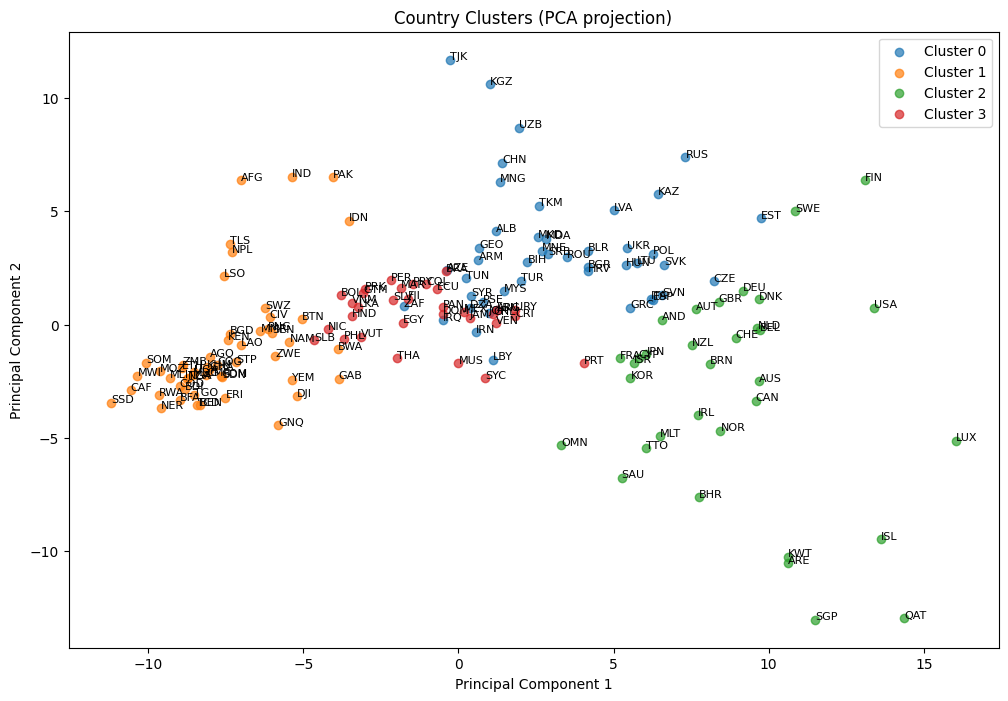

In [136]:
# Reduce to 2 principal components
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

# Add PCA coordinates to df_features
df_features["PC1"] = coords[:, 0]
df_features["PC2"] = coords[:, 1]

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in sorted(df_features["Cluster"].unique()):
    cluster_data = df_features[df_features["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {cluster}", alpha=0.7)

    # Annotate each point with country name
    for i, row in cluster_data.iterrows():
        plt.text(row["PC1"], row["PC2"], str(i), fontsize=8)  # i = index (Country Code)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Country Clusters (PCA projection)")
plt.legend()
plt.show()